## Testing phase for filtered unpadded/padded MEG data

Here we explore how padding the MEG data affects its phase.

In [2]:
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
..MATLAB started and connected!


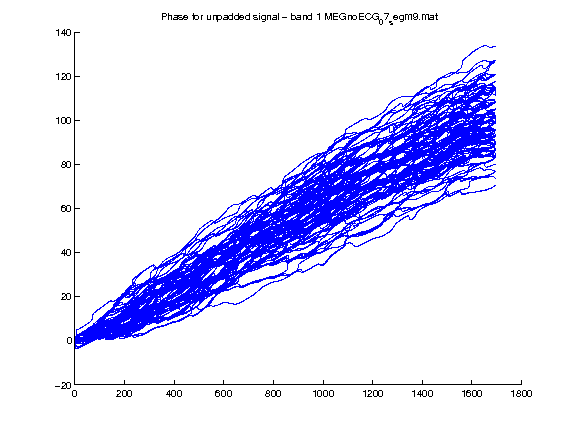

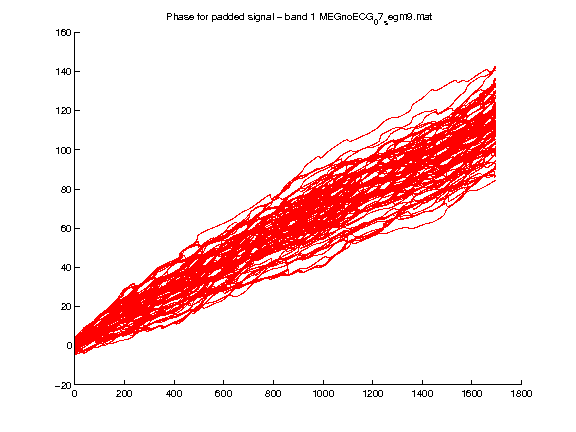

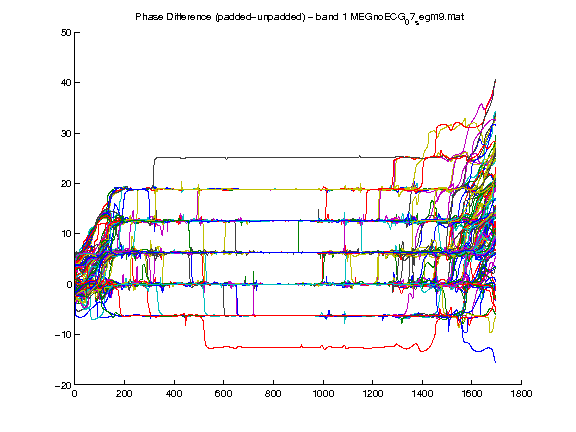

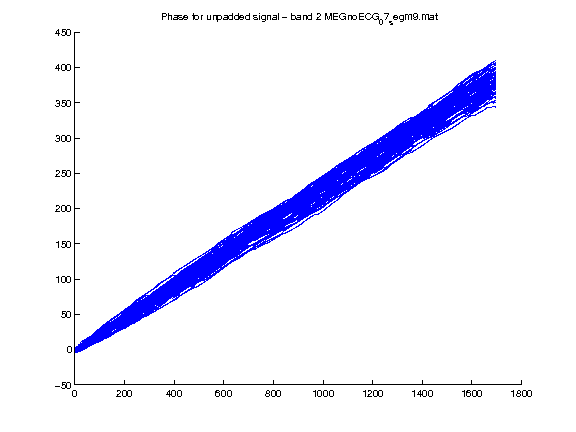

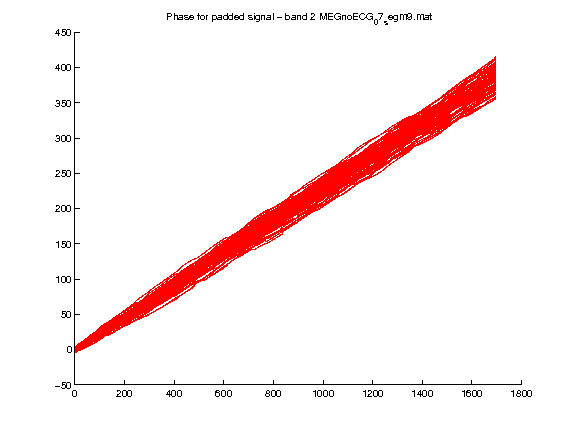

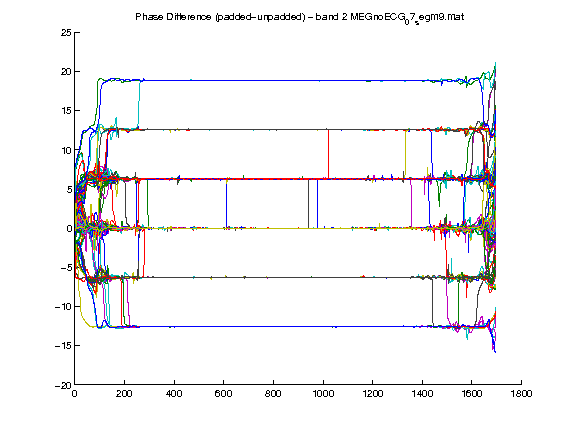

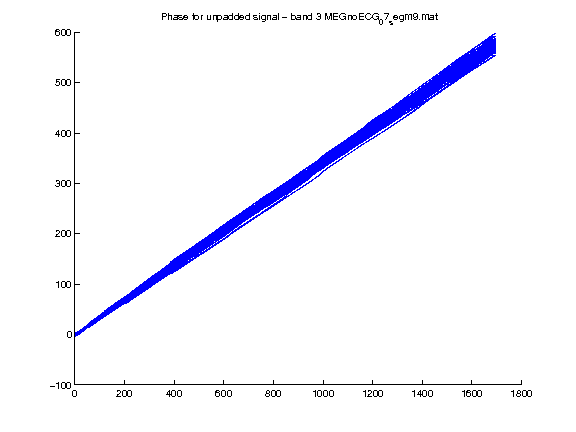

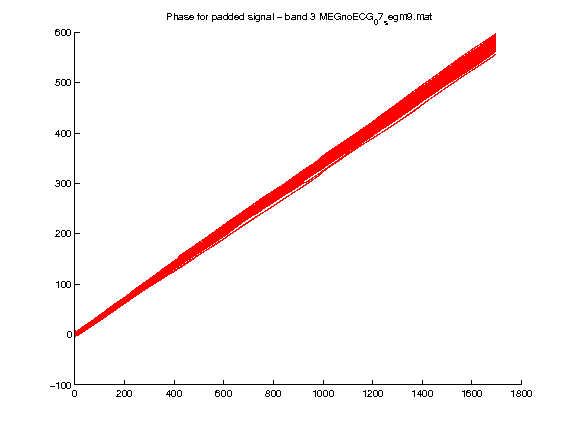

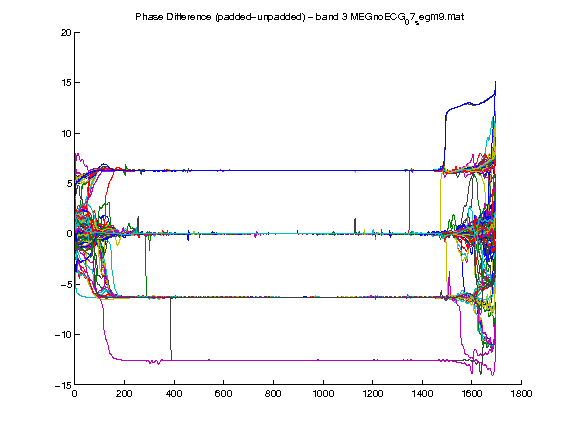

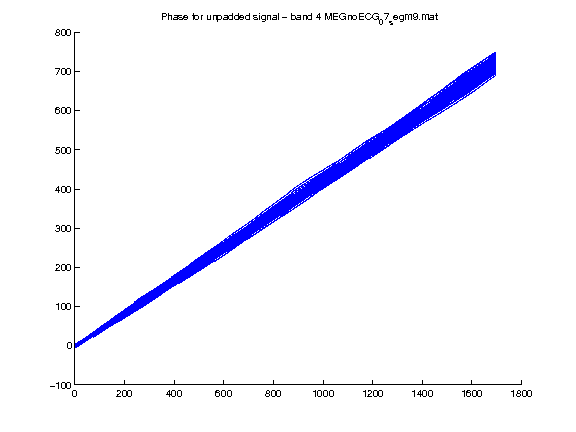

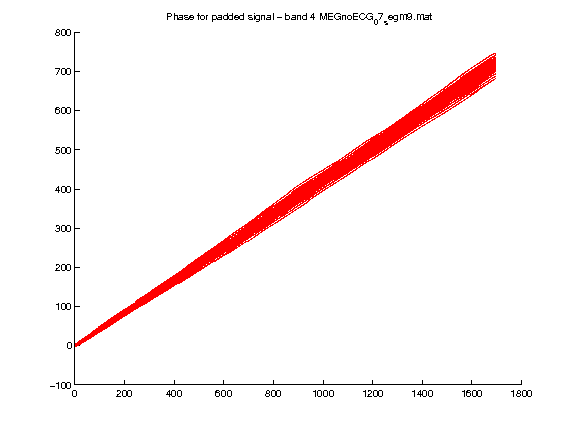

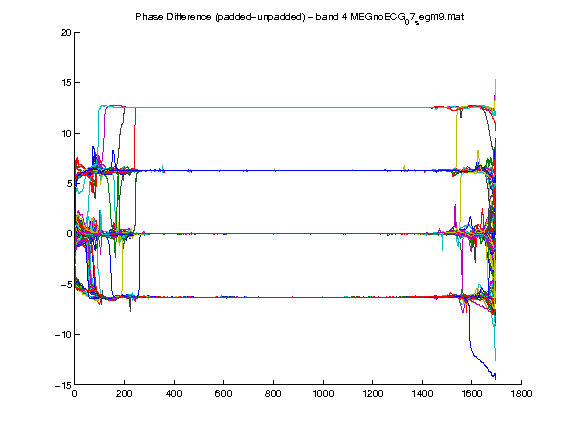

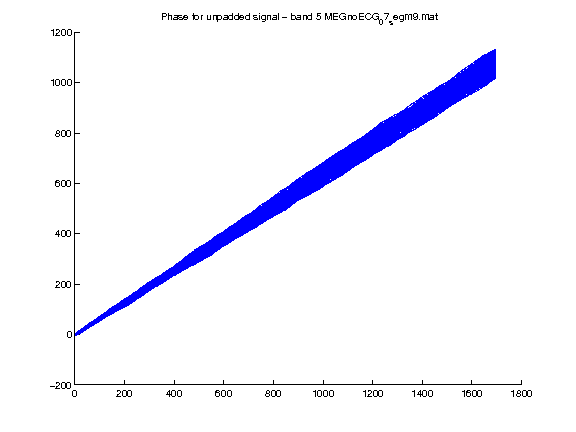

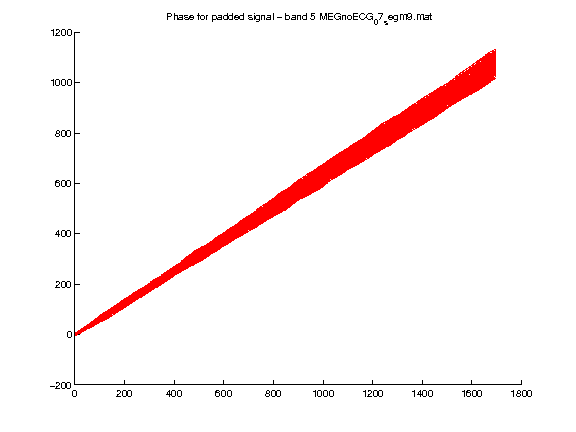

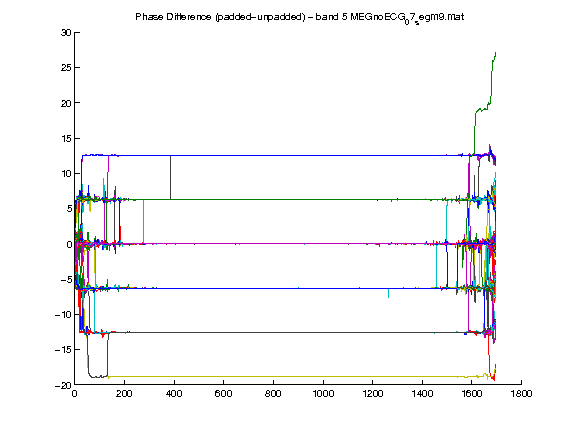

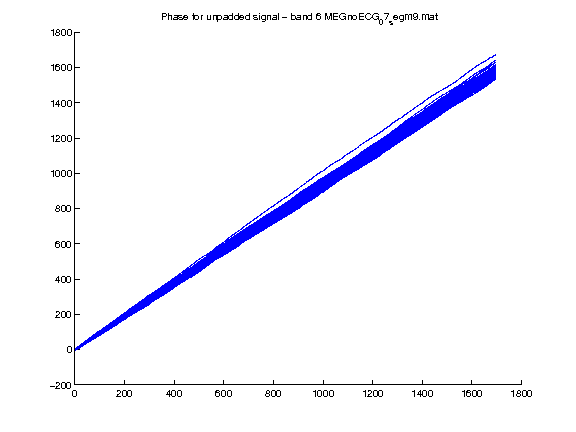

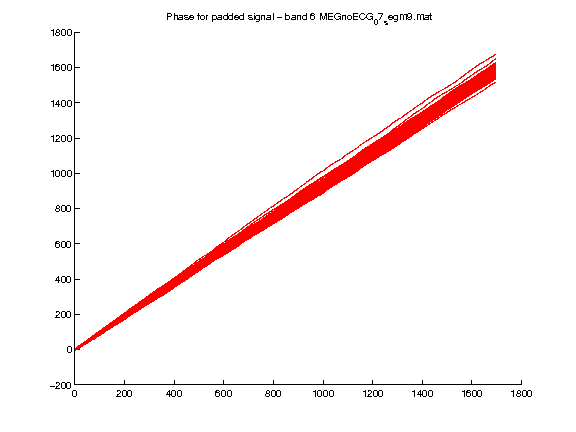

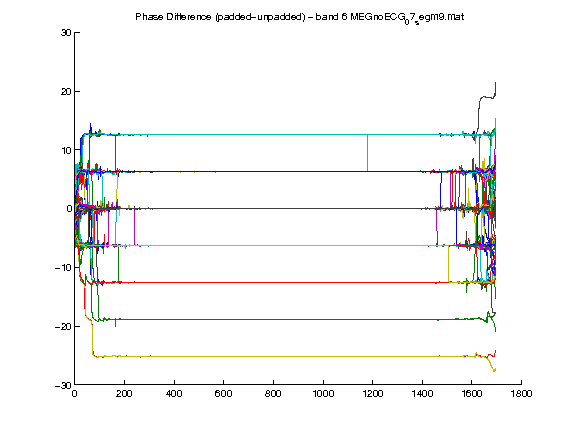

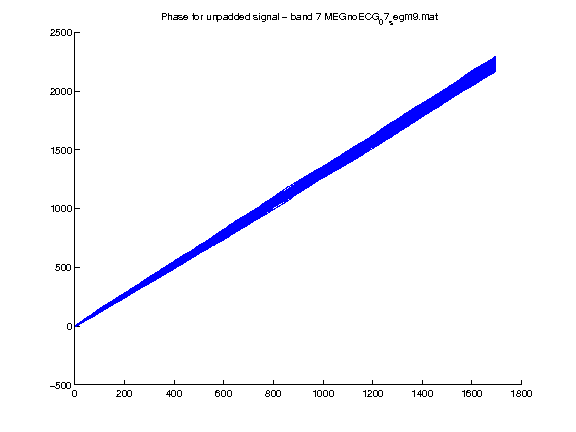

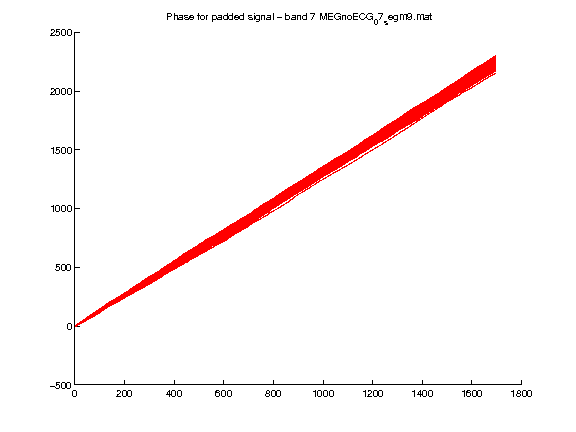

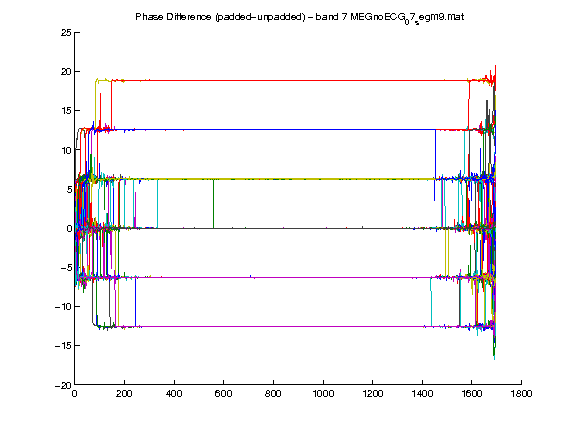

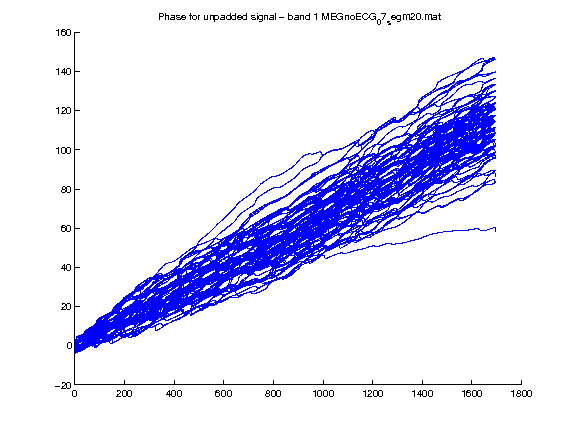

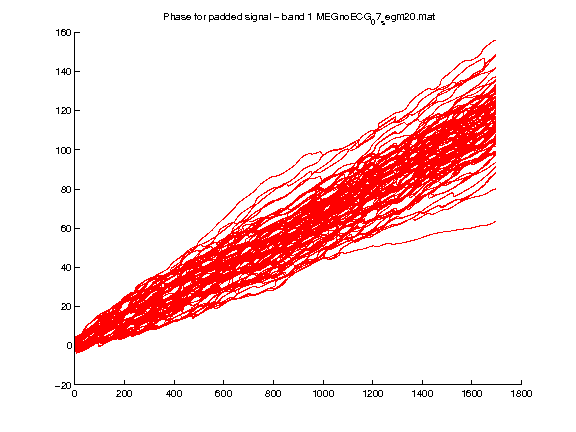

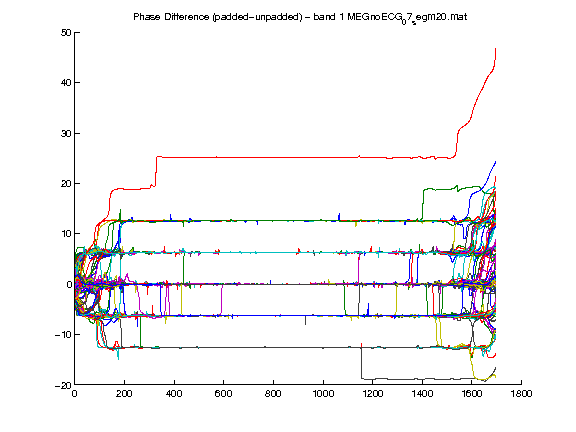

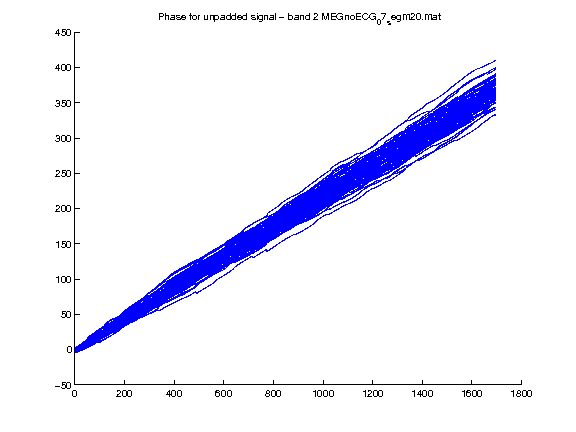

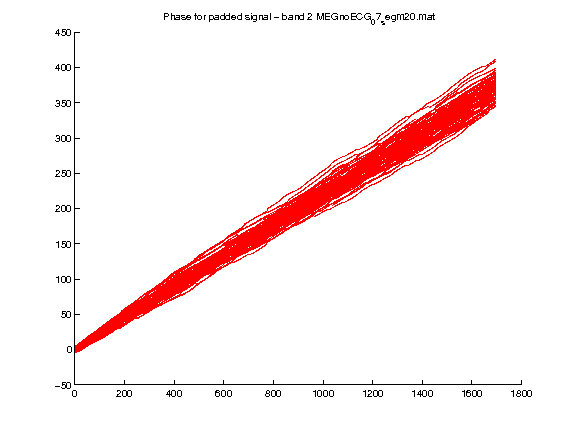

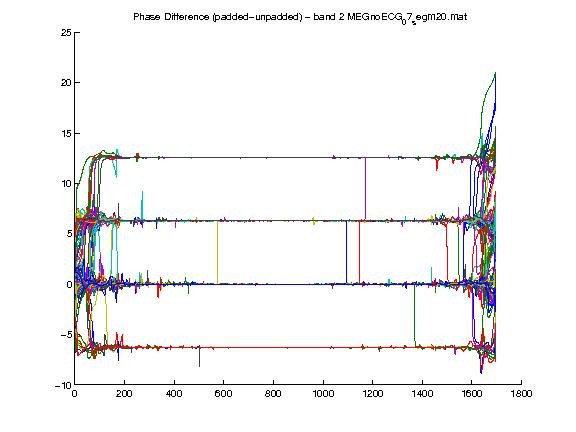

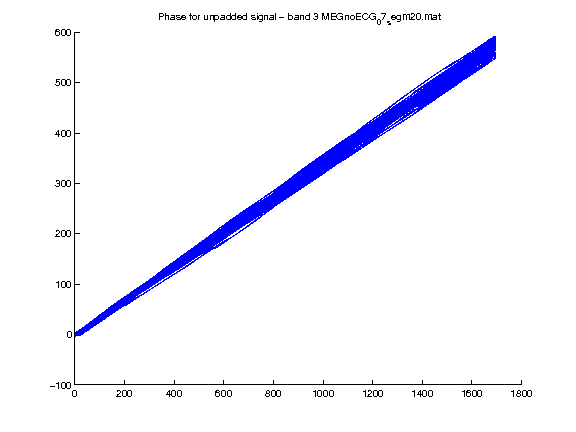

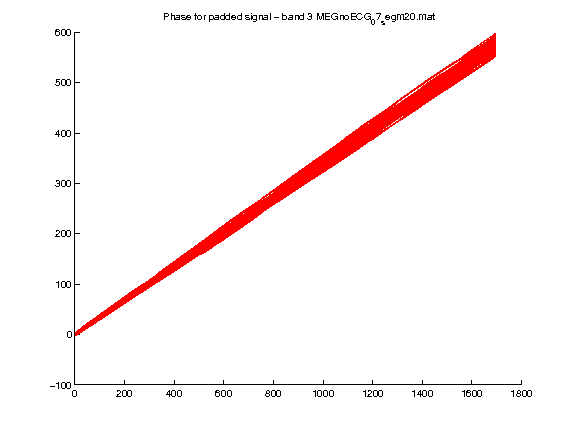

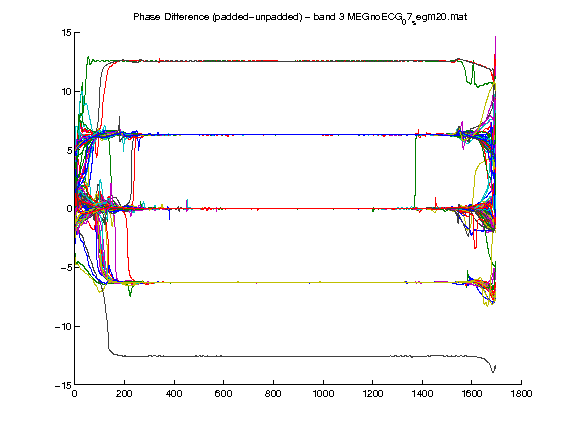

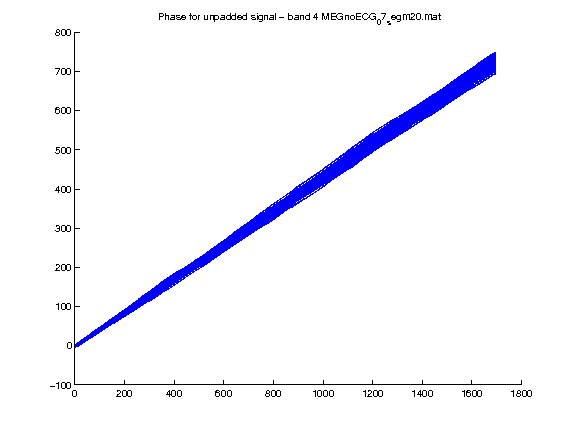

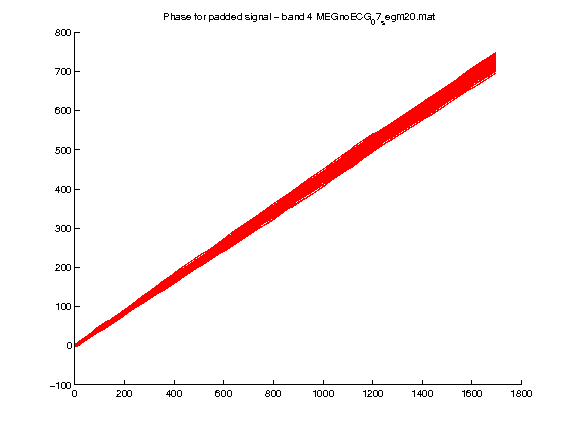

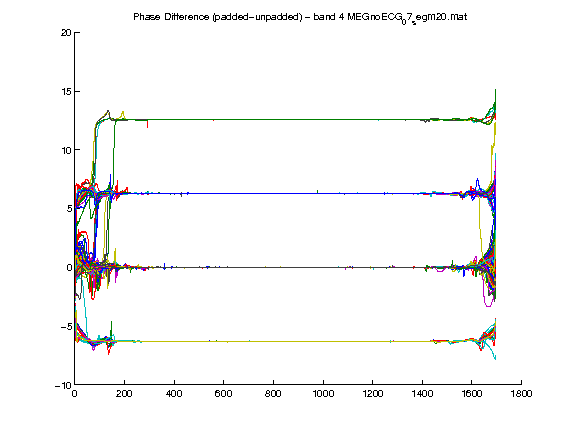

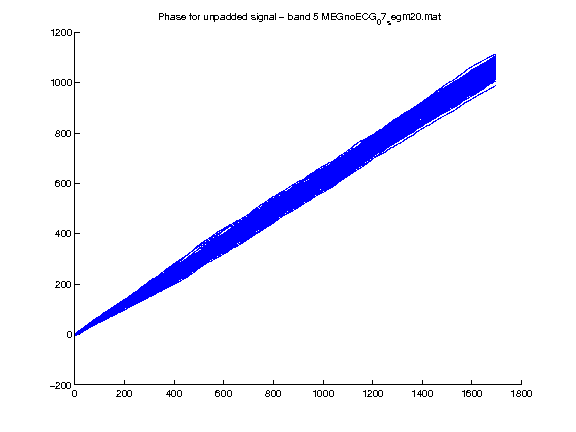

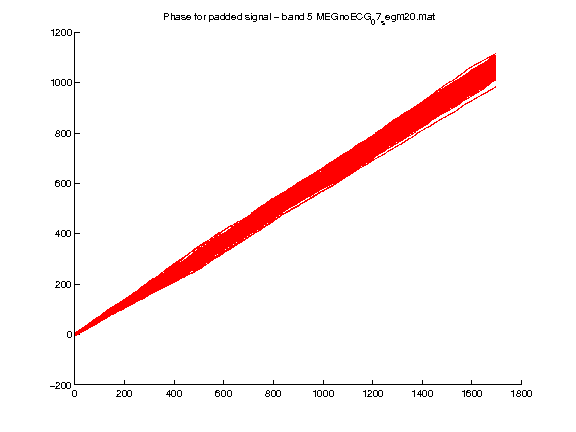

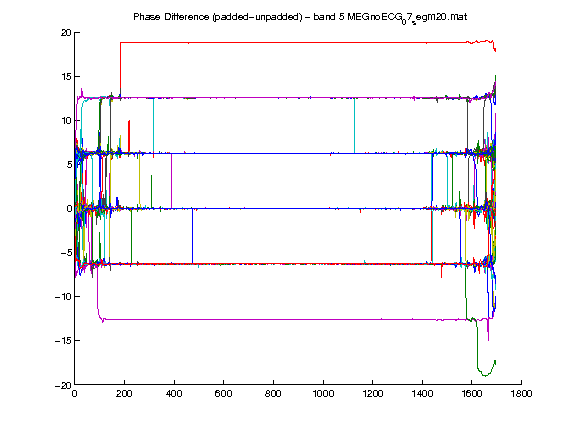

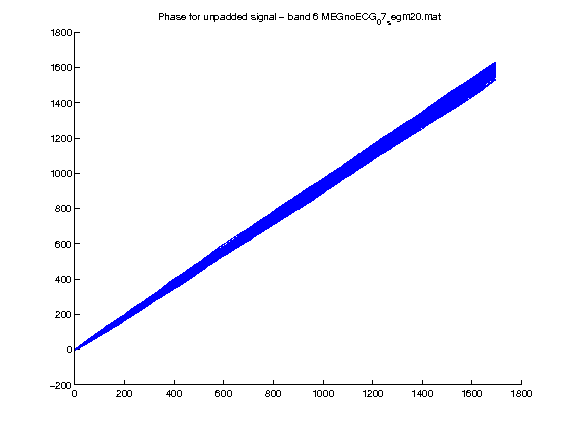

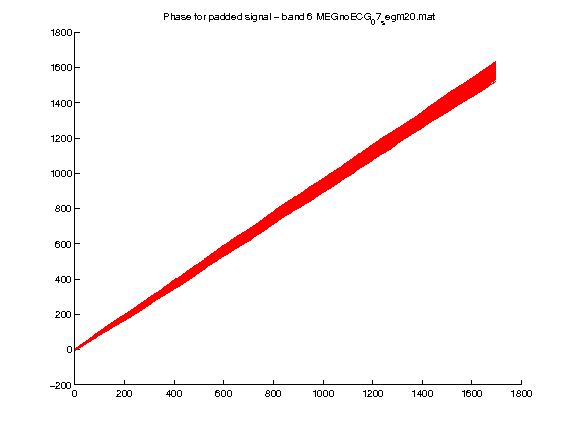

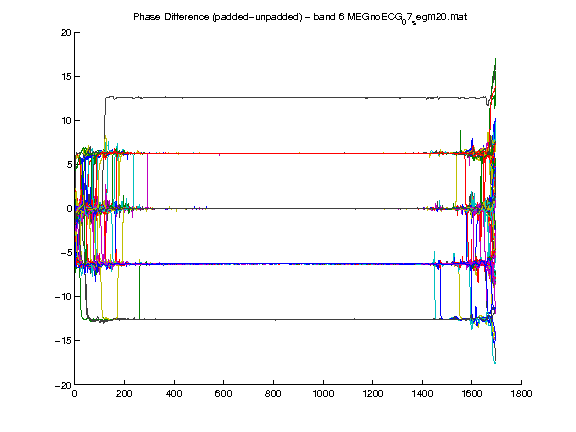

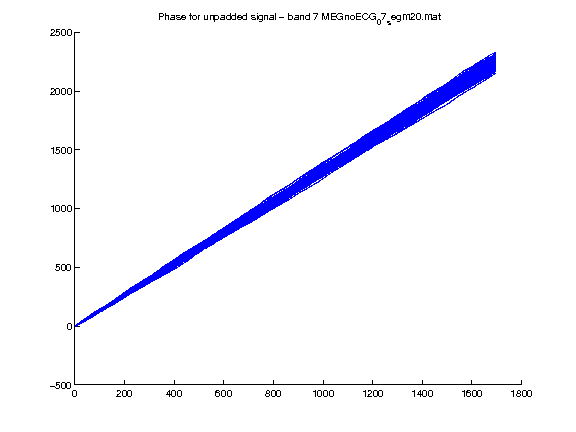

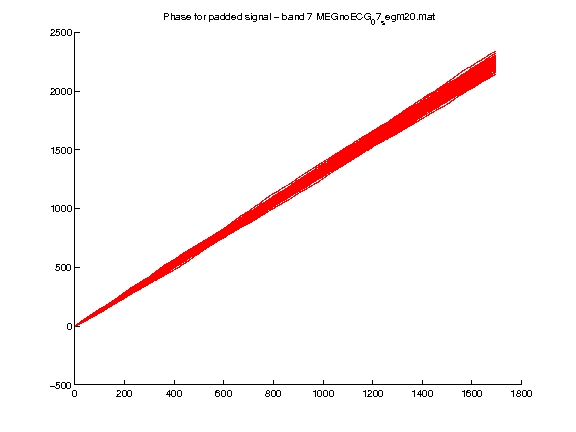

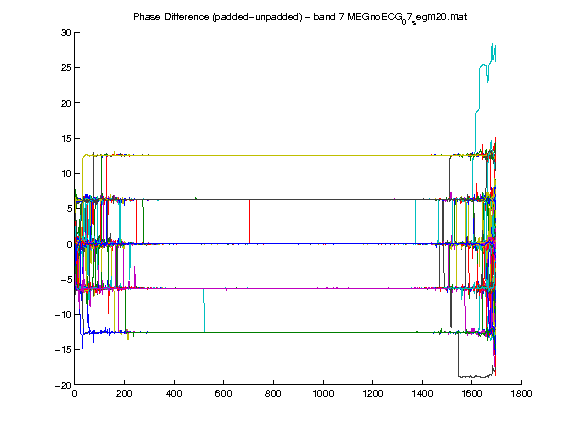

In [3]:
%%matlab
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% Checks if instantaneous phase of filtered padded/unpadded signals are
%%% similar. 
%%% Filtering is done in 7 bands of interest.
%%% The padded signal is filtered, trimmed, and then the Hilbert is computed.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

addpath('/home/dragos/DTC/MSc/SummerProject');

Fs = 169.54;
FILTER_ORDER = 560;



% load header file
load('/home/dragos/DTC/MSc/SummerProject/4D_header_adapted.mat');

% add data folders to path
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/MEG_50863_noECG_10s/07');
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/MEG_50863_noECG_10s/AL41D');

megFiles = {'MEGnoECG_07_segm9.mat', ... 
        'MEGnoECG_07_segm20.mat', ...
        'MEGnoECG_AL41D_segm6.mat', ...
        'MEGnoECG_AL41D_segm29'};
 
% 1 - delta, 2 - theta, 3 - lower alpha, 4 - higher alpha, 
% 5 - lower beta, 6 - higher beta, 7 - gamma
bandsOfInterest = [ [0.5 4]; [4 8]; [8 10]; [10 13]; [13 22]; [22 30]; [30 45] ];

% filter it 
%low = 0.5;
%high = 4;
%bandFilt = fir1( FILTER_ORDER, [low/(Fs/2) high/(Fs/2)] );
%freqz(bandFilt,1,1024)

for i=1:2 %length(megFiles)
    epoch = load( megFiles{i} );
    meg = epoch.meg_no_ecg;
    
    % demean the MEG signal
    bsxfun( @minus, meg, mean(meg,2) );
    
    % for each band of interest
    for bandIdx = 1:size(bandsOfInterest,1)
        
        low = bandsOfInterest(bandIdx, 1);
        high = bandsOfInterest(bandIdx, 2);
        bandFilt = fir1( FILTER_ORDER, [low/(Fs/2) high/(Fs/2)] );
        
        % transpose to filter by columns (channels)
        filteredMEG = filtfilt(bandFilt, 1, meg');
        filteredMEG = filteredMEG';
        
        hsignal = hilbert( transpose(filteredMEG) );
               
        % pad signal symmetrically (200 columns at beginning and end) and take Hilbert
        L = [0, 200]; %% add 0 rows, 200 columns (on each side)
        % wextend(TYPE,MODE,X,L,LOC)    
        megPadded = wextend('2D', 'sym', meg, L);  %% symmetric padding
        filteredPadMEG = filtfilt(bandFilt, 1, megPadded');
        filteredPadMEG = filteredPadMEG';
        filteredPadMEG = filteredPadMEG(:, 201:end-200);
        
        hsignalPadded = hilbert( transpose(filteredPadMEG) );
        
        
        figure; hold on;
        title(sprintf('Phase for unpadded signal - band %d %s', bandIdx, megFiles{i}));
        unwrappedSig = unwrap(angle(hsignal));
        plot( unwrappedSig, 'b' );
        
        figure; hold on;
        title(sprintf('Phase for padded signal - band %d %s', bandIdx, megFiles{i}));
        unwrappedSigPadded = unwrap(angle(hsignalPadded));
        plot(unwrappedSigPadded , 'r' );
        
        figure; hold on;
        title(sprintf('Phase Difference (padded-unpadded) - band %d %s', bandIdx, megFiles{i}));
        diff = unwrappedSigPadded - unwrappedSig;
        plot(diff)
    
    end
end

### Filter padded signal, compute Hilbert, trim it to keep only the central part

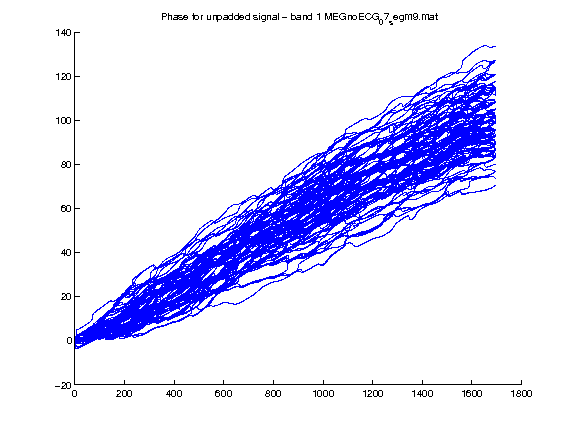

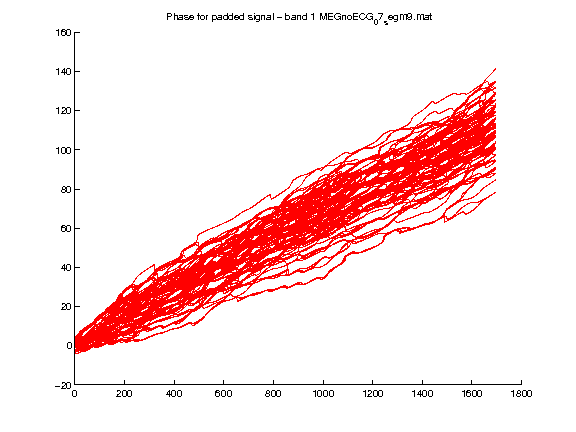

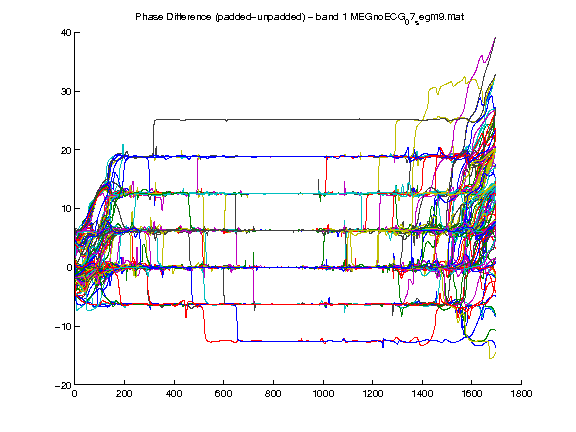

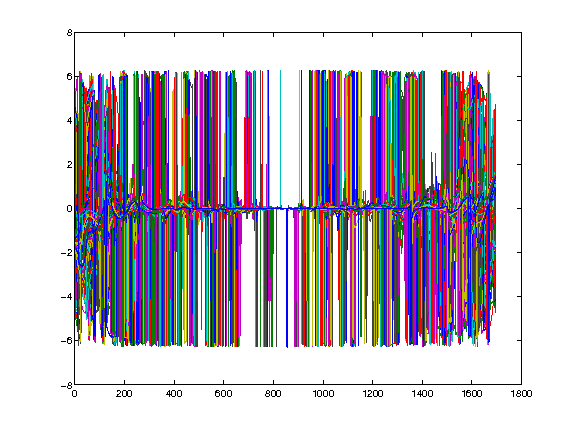

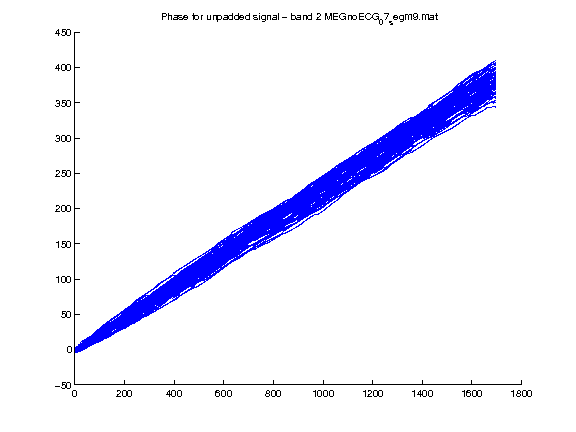

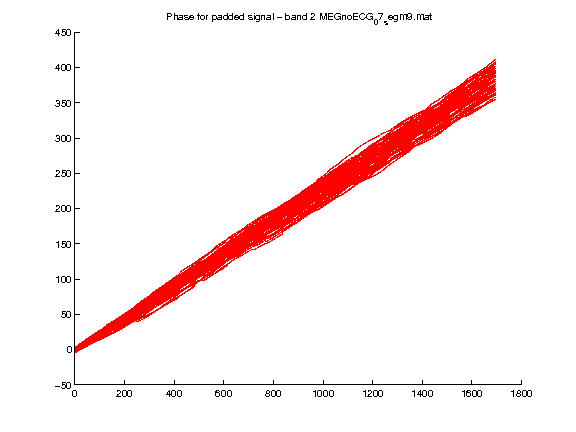

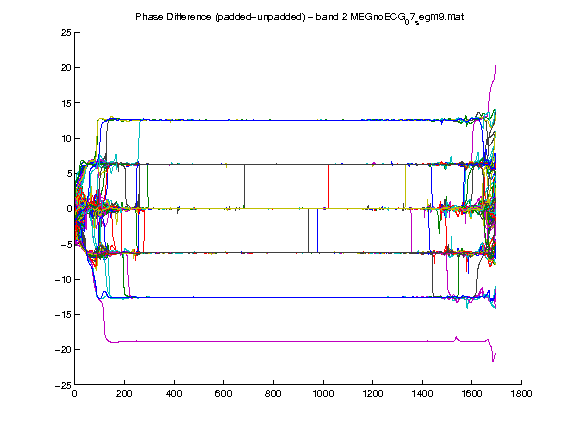

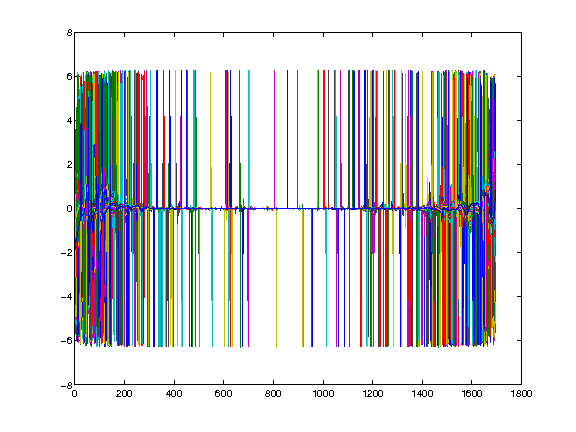

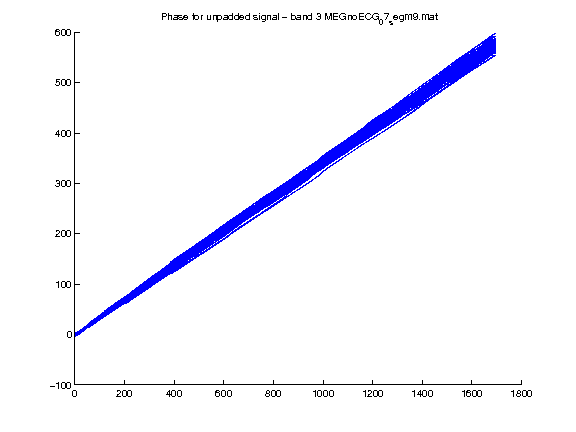

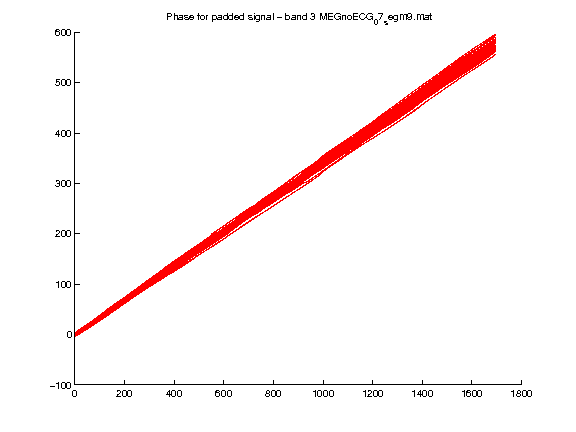

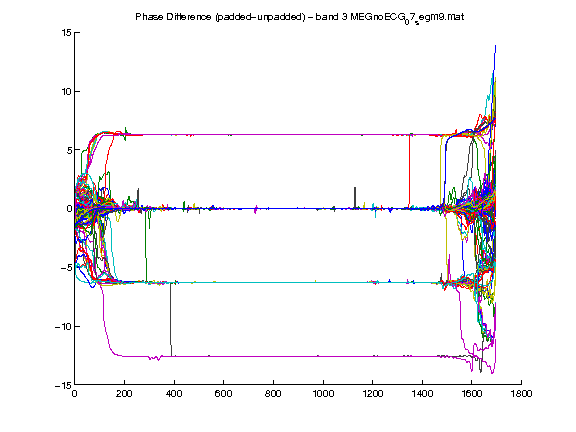

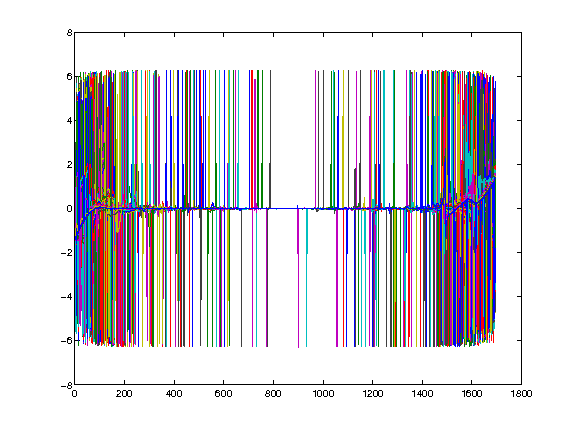

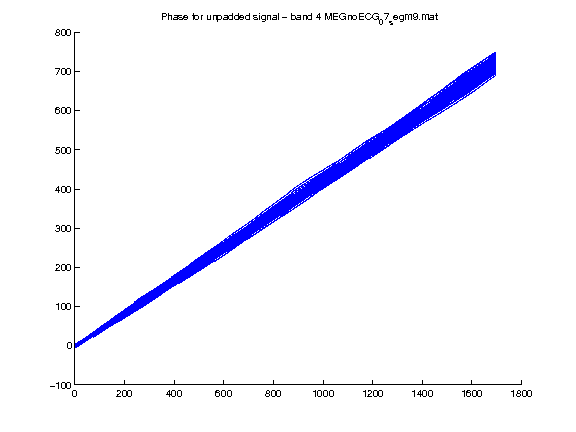

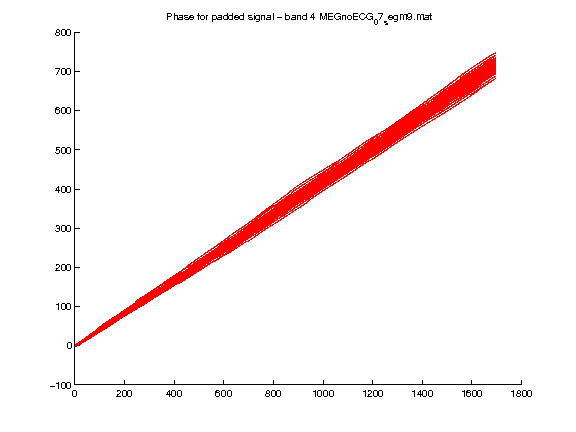

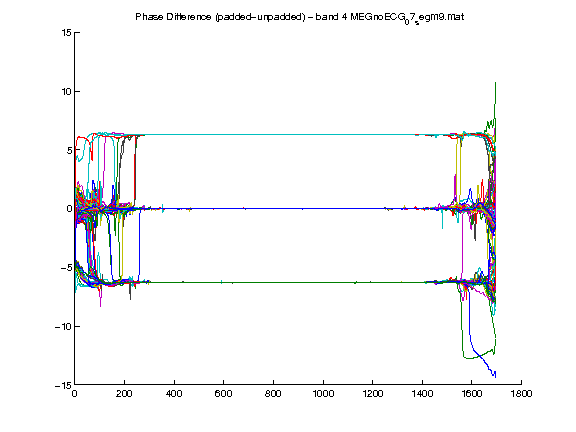

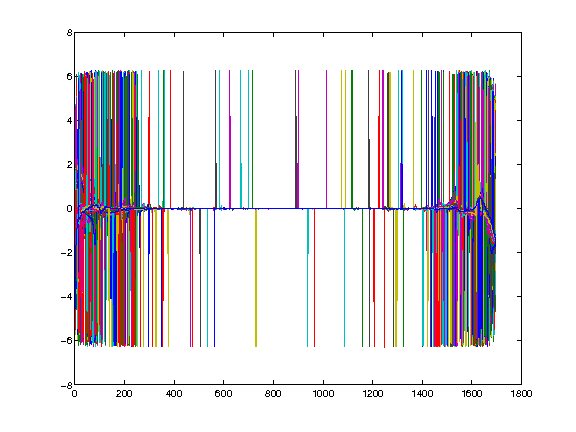

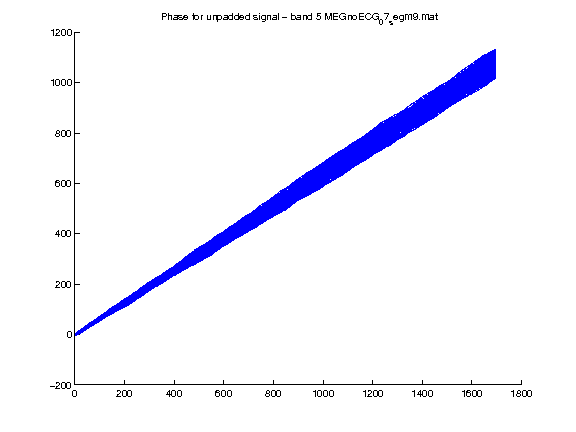

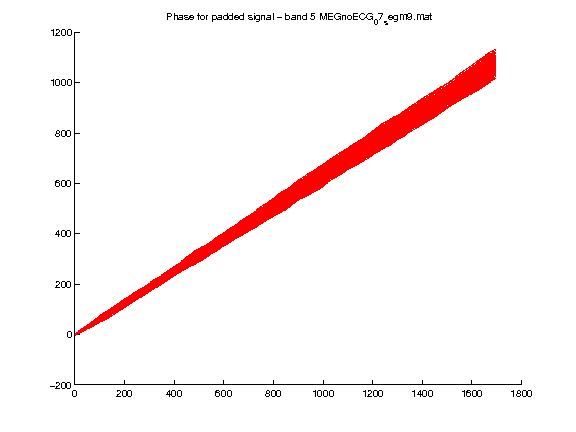

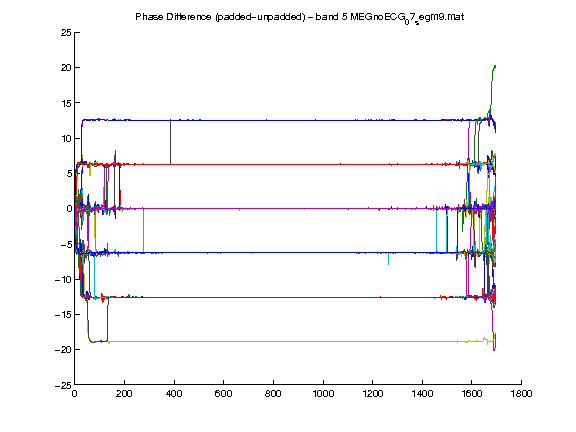

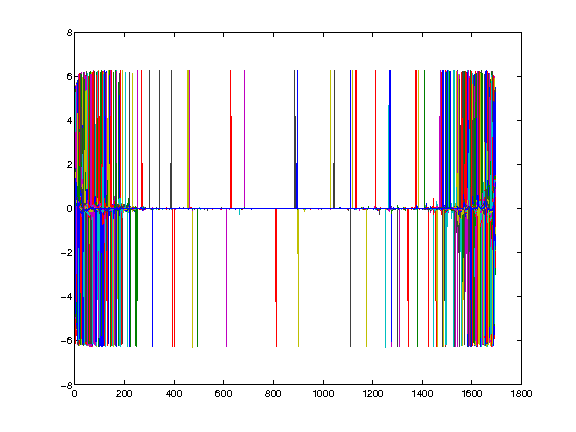

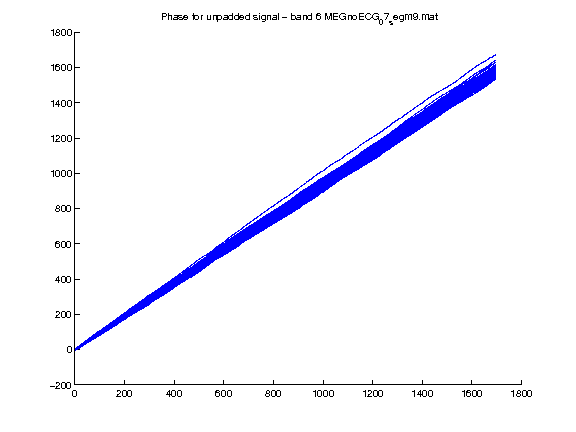

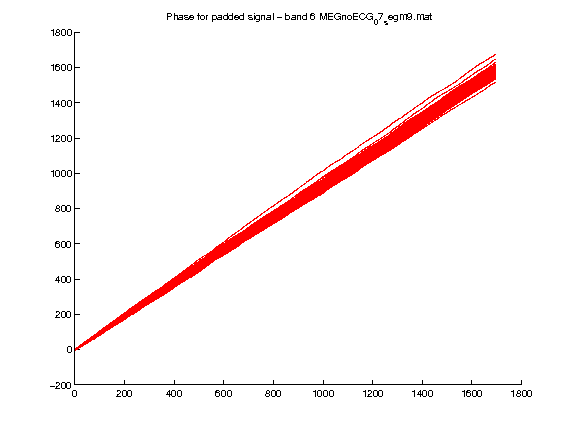

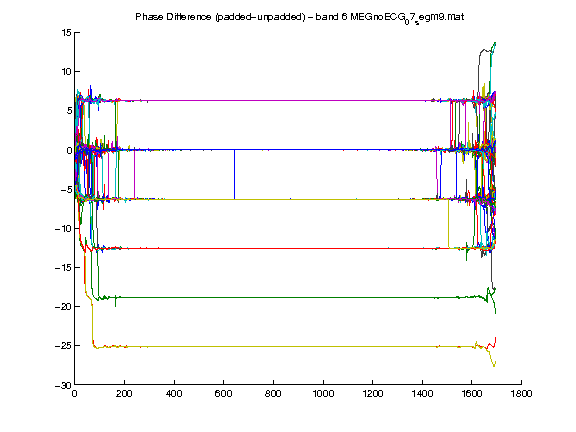

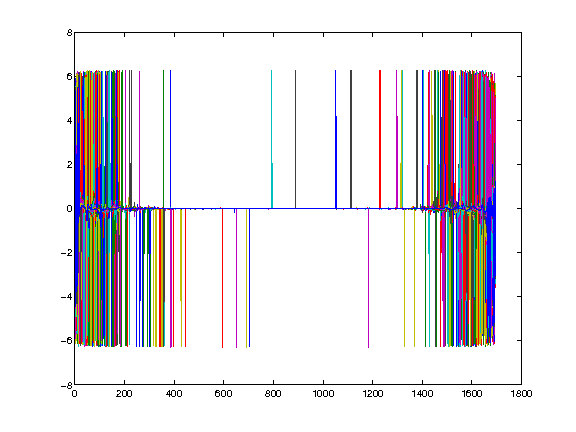

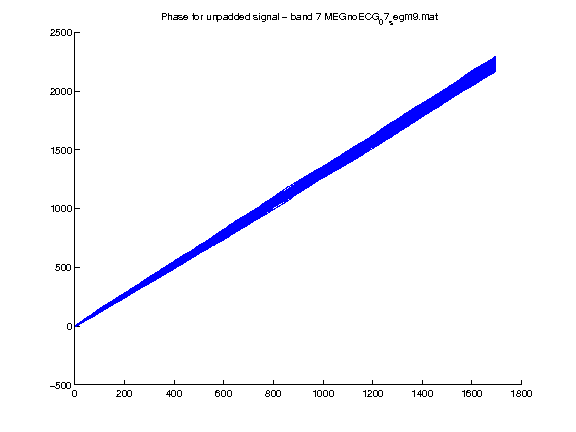

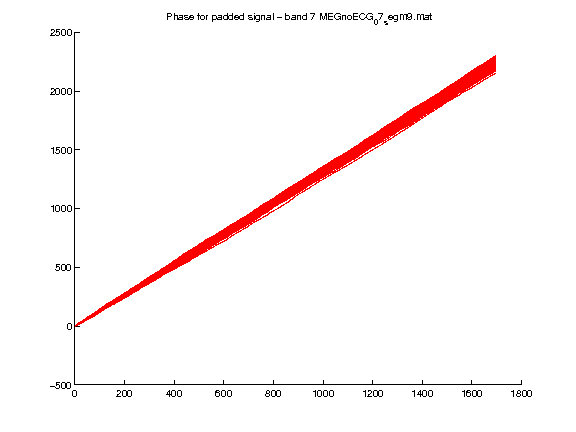

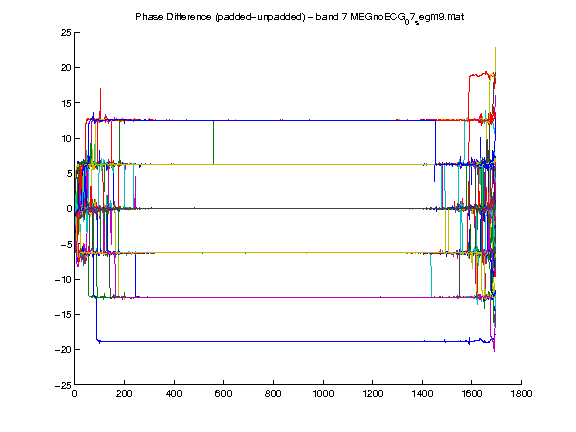

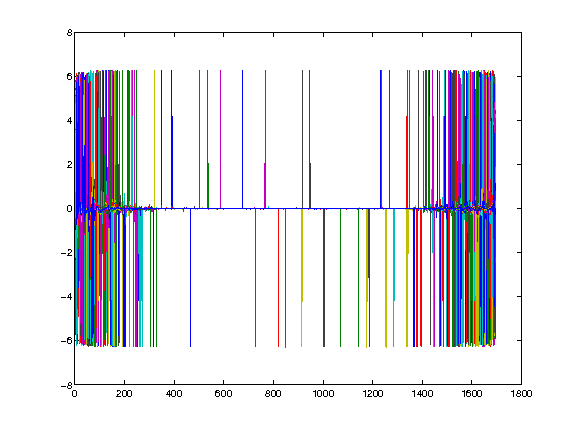

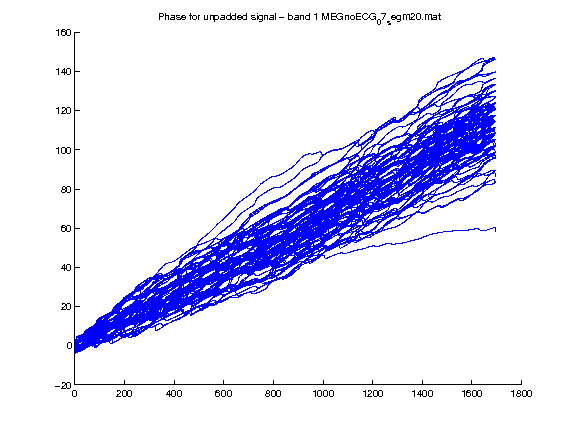

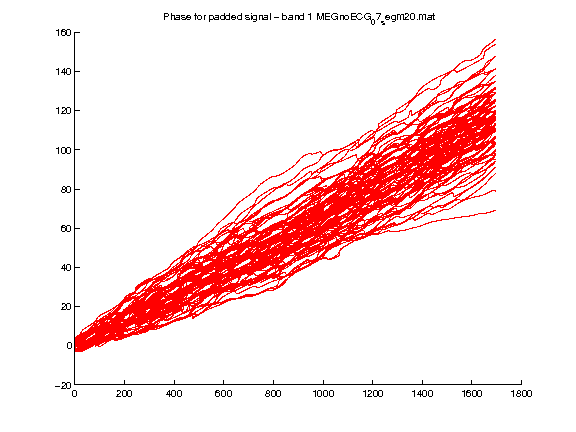

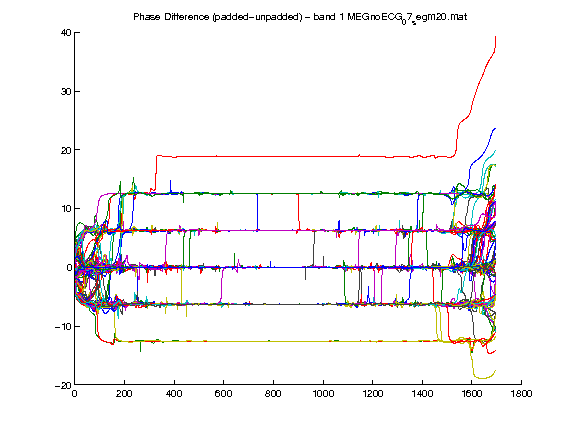

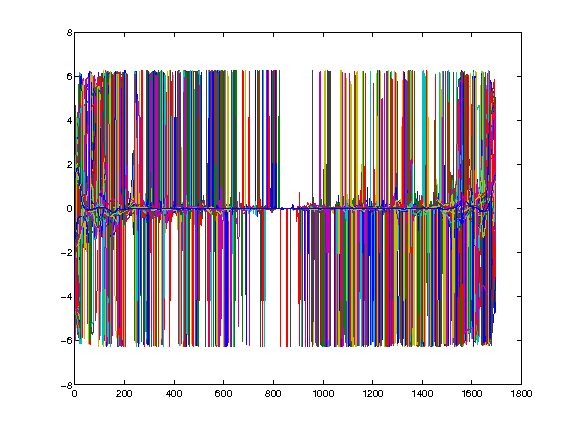

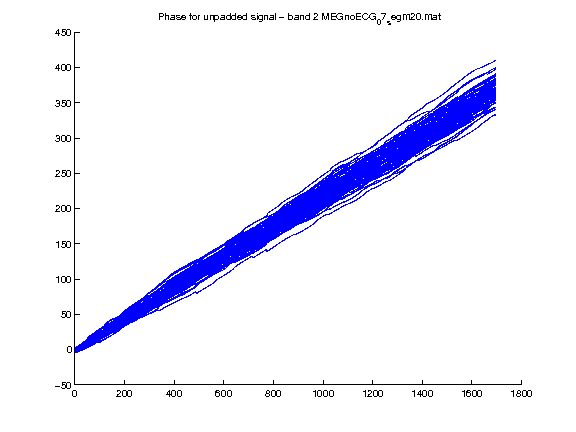

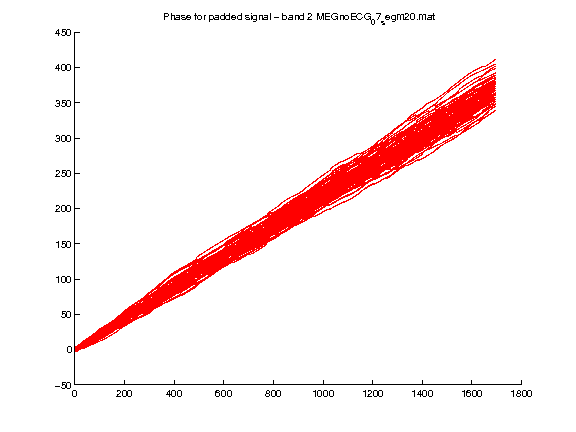

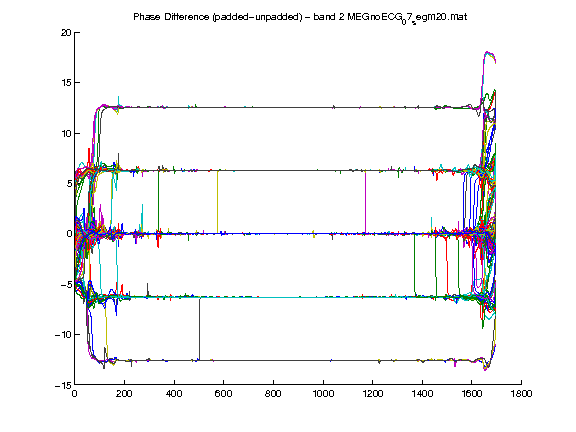

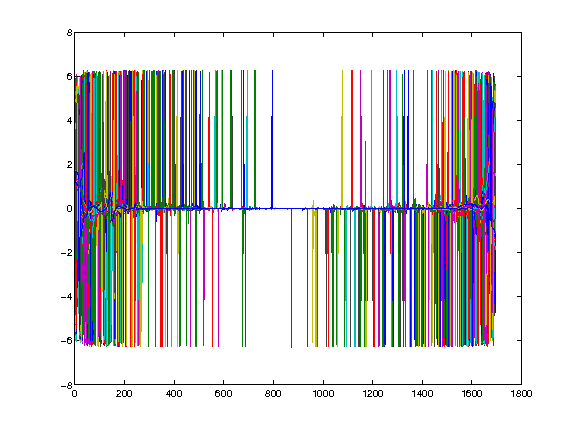

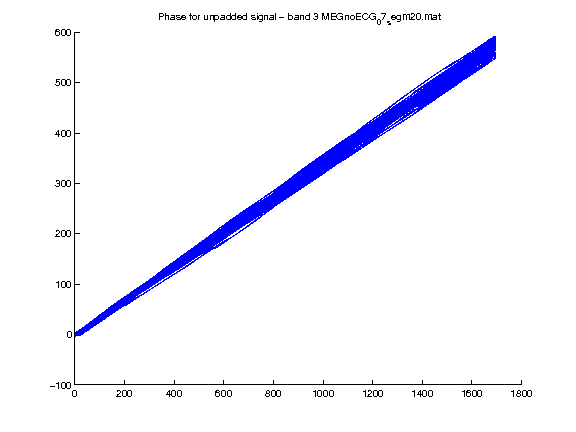

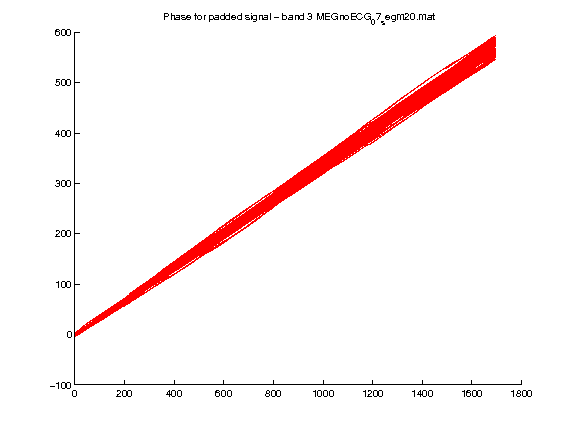

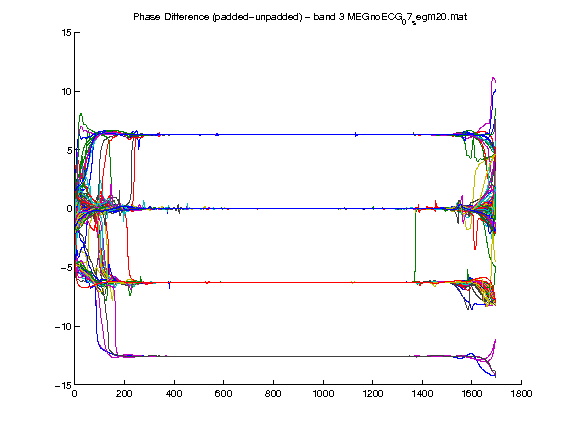

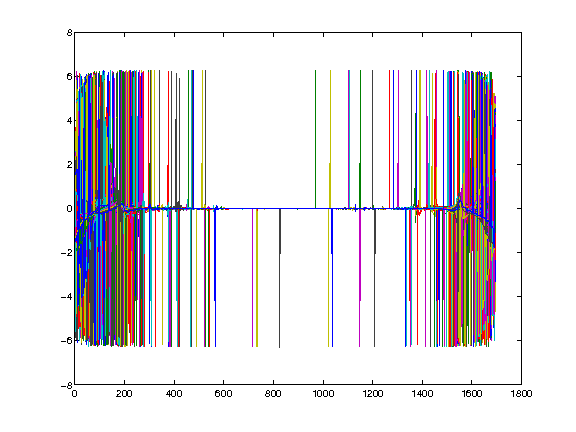

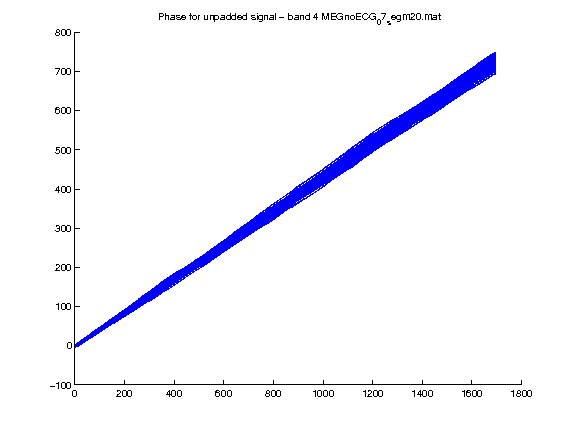

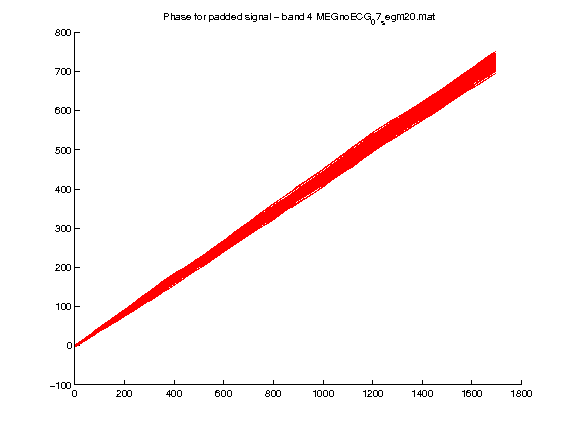

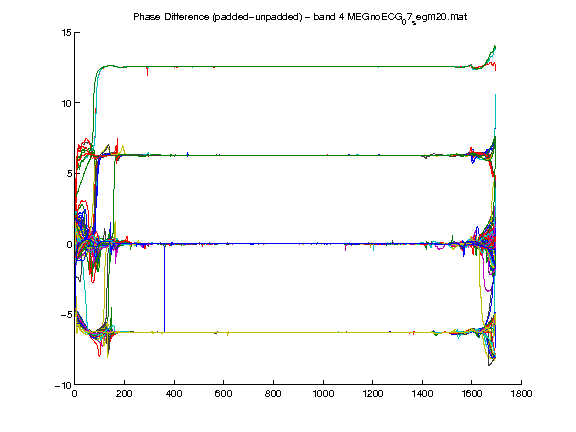

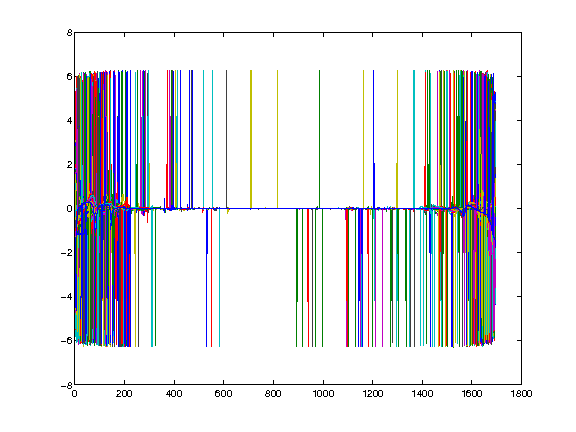

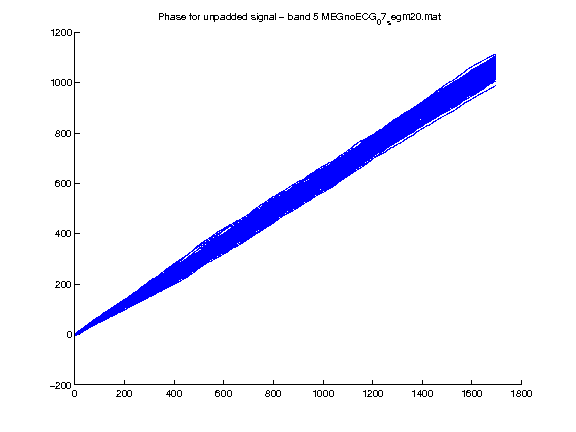

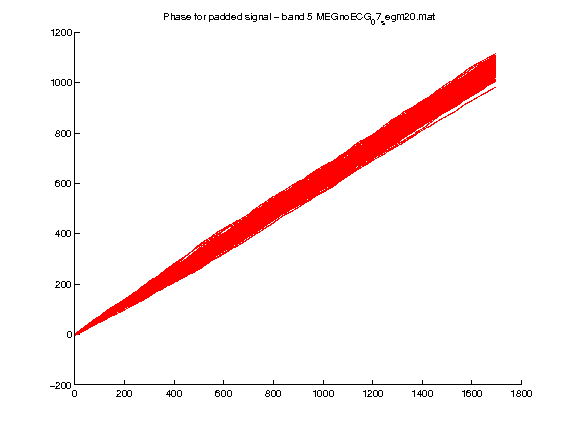

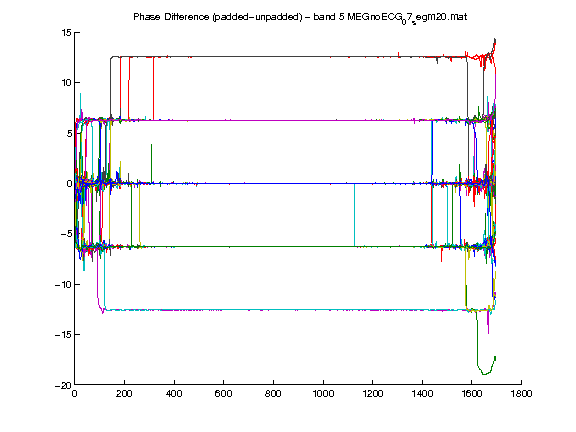

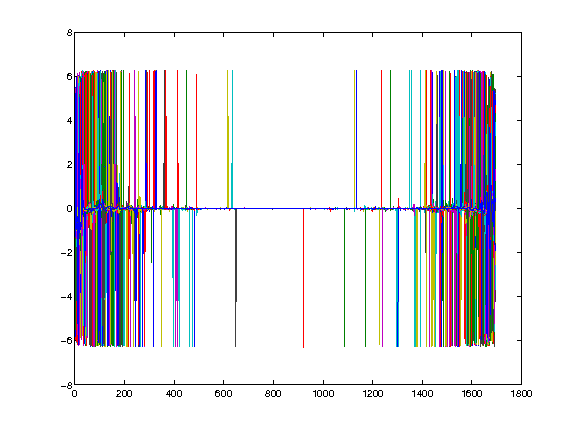

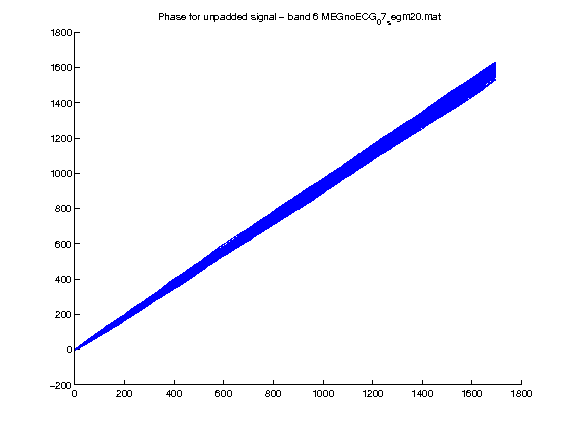

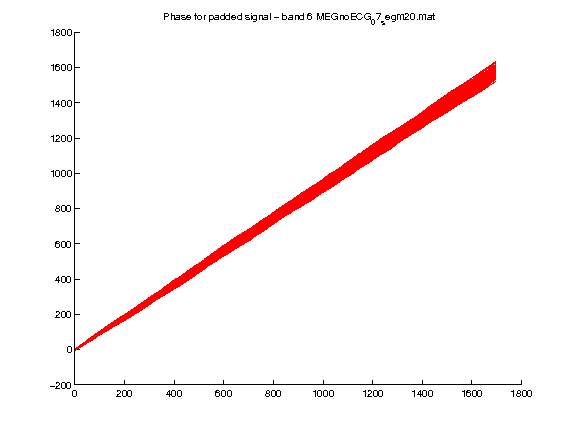

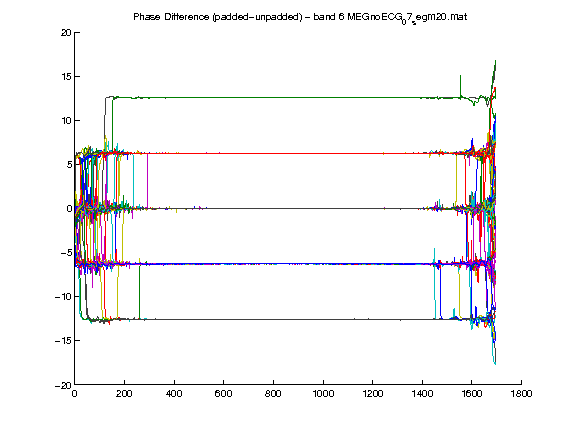

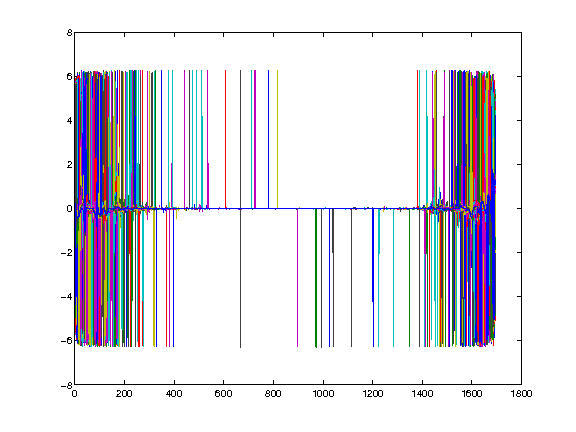

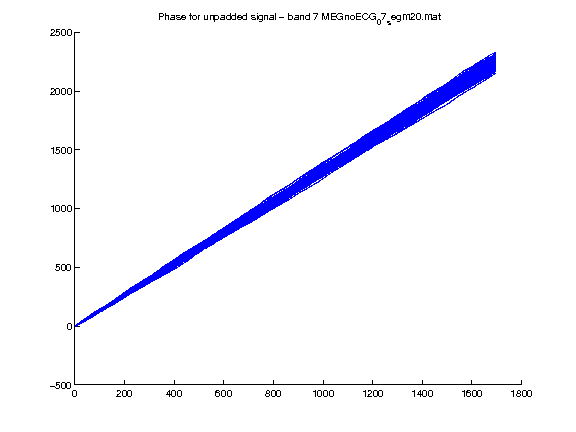

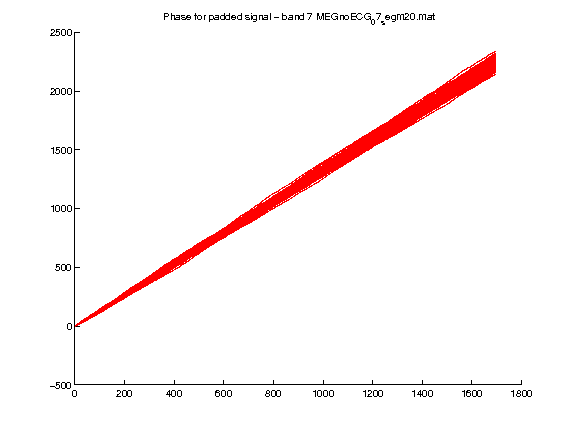

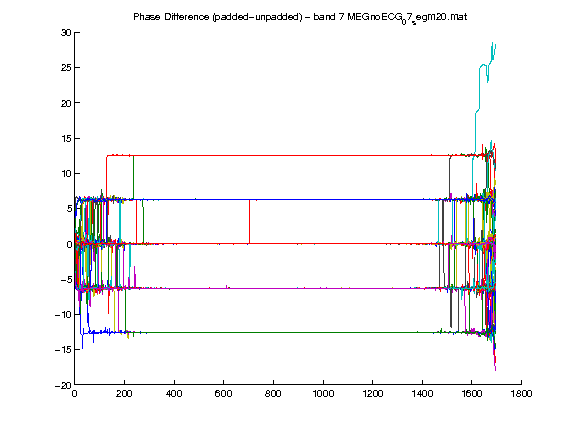

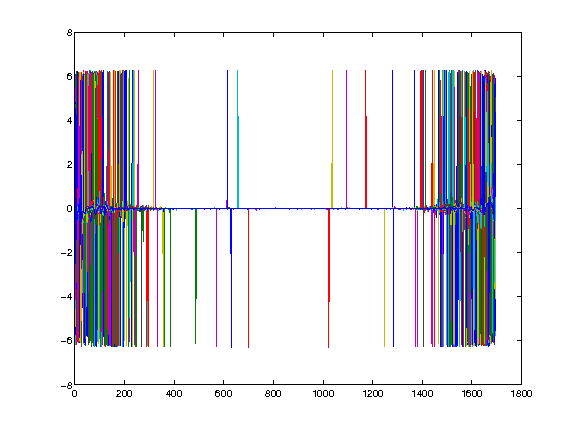

In [4]:
%%matlab
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% Checks if instantaneous phase of filtered padded/unpadded signals are
%%% similar. 
%%% Filtering is done in 7 bands of interest.
%%% Filter padded signal, compute Hilbert, trim it to keep only the central part.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

addpath('/home/dragos/DTC/MSc/SummerProject');

Fs = 169.54;
FILTER_ORDER = 560;



% load header file
load('/home/dragos/DTC/MSc/SummerProject/4D_header_adapted.mat');

% add data folders to path
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/MEG_50863_noECG_10s/07');
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/MEG_50863_noECG_10s/AL41D');

megFiles = {'MEGnoECG_07_segm9.mat', ... 
        'MEGnoECG_07_segm20.mat', ...
        'MEGnoECG_AL41D_segm6.mat', ...
        'MEGnoECG_AL41D_segm29'};
 
% 1 - delta, 2 - theta, 3 - lower alpha, 4 - higher alpha, 
% 5 - lower beta, 6 - higher beta, 7 - gamma
bandsOfInterest = [ [0.5 4]; [4 8]; [8 10]; [10 13]; [13 22]; [22 30]; [30 45] ];

% filter it 
%low = 0.5;
%high = 4;
%bandFilt = fir1( FILTER_ORDER, [low/(Fs/2) high/(Fs/2)] );
%freqz(bandFilt,1,1024)

for i=1:2 %length(megFiles)
    epoch = load( megFiles{i} );
    meg = epoch.meg_no_ecg;
    
    % demean the MEG signal
    bsxfun( @minus, meg, mean(meg,2) );
    
    % for each band of interest
    for bandIdx = 1:size(bandsOfInterest,1)
        
        low = bandsOfInterest(bandIdx, 1);
        high = bandsOfInterest(bandIdx, 2);
        bandFilt = fir1( FILTER_ORDER, [low/(Fs/2) high/(Fs/2)] );
        
        % transpose to filter by columns (channels)
        filteredMEG = filtfilt(bandFilt, 1, meg');
        filteredMEG = filteredMEG';
        
        hsignal = hilbert( transpose(filteredMEG) );
               
        % pad signal symmetrically (200 columns at beginning and end) and take Hilbert
        L = [0, 200]; %% add 0 rows, 200 columns (on each side)
        % wextend(TYPE,MODE,X,L,LOC)    
        megPadded = wextend('2D', 'sym', meg, L);  %% symmetric padding
        filteredPadMEG = filtfilt(bandFilt, 1, megPadded');
        filteredPadMEG = filteredPadMEG'; % here I have channels x samples
        %filteredPadMEG = filteredPadMEG(:, 201:end-200);
        
        hsignalPadded = hilbert( transpose(filteredPadMEG) ); % hilbert columnwise (channels)
        hsignalPadded = hsignalPadded(201:end-200, :); % trim padded samples
        %size(hsignalPadded)
        
        figure; hold on;
        title(sprintf('Phase for unpadded signal - band %d %s', bandIdx, megFiles{i}));
        unwrappedSig = unwrap(angle(hsignal));
        plot( unwrappedSig, 'b' );
        
        figure; hold on;
        title(sprintf('Phase for padded signal - band %d %s', bandIdx, megFiles{i}));
        unwrappedSigPadded = unwrap(angle(hsignalPadded));
        plot(unwrappedSigPadded , 'r' );
        
        figure; hold on;
        title(sprintf('Phase Difference (padded-unpadded) - band %d %s', bandIdx, megFiles{i}));
        diff = unwrappedSigPadded - unwrappedSig;
        plot(diff)
        
        figure; 
        plot(angle(hsignalPadded) - angle(hsignal))
    
    end
end

In [ ]:
%%matlab
size(diff)

In [6]:
%unload_ext pymatbridge

MATLAB closed
